In [1]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

/home/administrator/anaconda3/envs/core-dev/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [19]:
train_dir = Path('/home/' + os.environ['USER'] +'/Dropbox/core_data/facies/train_data')
train_dir, train_dir.exists()

(PosixPath('/home/administrator/Dropbox/core_data/facies/train_data'), True)

In [20]:
depth_files = sorted(train_dir.glob('*_depth.npy'))
label_files = sorted(train_dir.glob('*_labels.npy'))

well_dl = {d.name.split('_')[0] : (d, l) for d, l in zip(depth_files, label_files)}
well_dl

{'204-19-2': (PosixPath('/home/administrator/Dropbox/core_data/facies/train_data/204-19-2_depth.npy'),
  PosixPath('/home/administrator/Dropbox/core_data/facies/train_data/204-19-2_labels.npy')),
 '204-19-3A': (PosixPath('/home/administrator/Dropbox/core_data/facies/train_data/204-19-3A_depth.npy'),
  PosixPath('/home/administrator/Dropbox/core_data/facies/train_data/204-19-3A_labels.npy')),
 '204-19-6': (PosixPath('/home/administrator/Dropbox/core_data/facies/train_data/204-19-6_depth.npy'),
  PosixPath('/home/administrator/Dropbox/core_data/facies/train_data/204-19-6_labels.npy')),
 '204-19-7': (PosixPath('/home/administrator/Dropbox/core_data/facies/train_data/204-19-7_depth.npy'),
  PosixPath('/home/administrator/Dropbox/core_data/facies/train_data/204-19-7_labels.npy')),
 '204-20-1Z': (PosixPath('/home/administrator/Dropbox/core_data/facies/train_data/204-20-1Z_depth.npy'),
  PosixPath('/home/administrator/Dropbox/core_data/facies/train_data/204-20-1Z_labels.npy')),
 '204-20-1': (

In [22]:
dd = np.concatenate([np.diff(np.load(dl[0])) for dl in well_dl.values()])

dd.shape

(4006048,)

In [23]:
np.median(dd)

0.00016781339149929408

In [25]:
np.median(dd)*dd.shape[0]

672.2685013889641

(array([325565., 911656., 995997., 419058.,  10498., 649741., 693546.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5]),
 <a list of 7 Patch objects>)

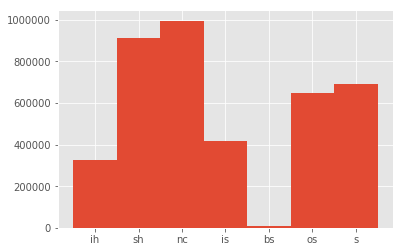

In [33]:
ll = np.concatenate([np.load(dl[1]) for dl in well_dl.values()])

plt.hist(ll, bins=np.arange(8)-0.5)

In [34]:
# looks like approx 1 million NC + BS rows ~ 25%
672.2685 * 0.75

504.201375